In [1]:
from google.colab import drive
drive.mount("/content/drive")

import sys
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/deeplens/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install lenstronomy
!pip install h5py
!pip install corner
!pip install Pillow

%cd  drive/MyDrive/'Colab Notebooks'/deeplens/fastell4py/
! python setup.py install
%cd ..

!pip install -U PyYAML

/content/drive/MyDrive/Colab Notebooks/deeplens/fastell4py
running install
running bdist_egg
running egg_info
running build_src
build_src
building extension "fastell4py._fastell" sources
f2py options: []
  adding 'build/src.linux-x86_64-3.7/build/src.linux-x86_64-3.7/fortranobject.c' to sources.
  adding 'build/src.linux-x86_64-3.7/build/src.linux-x86_64-3.7' to include_dirs.
  adding 'build/src.linux-x86_64-3.7/_fastell-f2pywrappers.f' to sources.
build_src: building npy-pkg config files
writing fastell4py.egg-info/PKG-INFO
writing dependency_links to fastell4py.egg-info/dependency_links.txt
writing namespace_packages to fastell4py.egg-info/namespace_packages.txt
writing requirements to fastell4py.egg-info/requires.txt
writing top-level names to fastell4py.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'fastell4py.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
running build_ext
cu

In [3]:
import copy
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# lenstronomy module import
from lenstronomy.SimulationAPI.sim_api import SimAPI

In [4]:
from lenshelpers import*

In [5]:
%ls

data/               deeplens.ipynb  lenshelpers.py  NeuralNet.ipynb
DataAnalysis.ipynb  fastell4py/     lens.ipynb      __pycache__/
deeplenshelpers.py  helpers.py      model/


In [6]:
# import tarfile
# tar = tarfile.open('rung0.tar.gz', "r:gz")
# tar.extractall()
# tar.close()

#### 1. Lens with mass profile

#### 2. Source light

In [30]:
LensDataset(10,1).imSim_hst

In [8]:

psf_hdu = fits.open('data/psf.fits')
kwargs_hst = HST().kwargs_single_band()
kwargs_hst['kernel_point_source'] = np.array(psf_hdu[0].data)
numPix = 64 

kwargs_model = {'lens_model_list': ['PEMD'],  # list of lens models to be used
                'source_light_model_list': ['SERSIC_ELLIPSE'],  # list of extended source models to be used
    }

kwargs_numerics = {'point_source_supersampling_factor': 1}

sim_hst = SimAPI(numpix=numPix, kwargs_single_band=kwargs_hst, kwargs_model=kwargs_model)
imSim_hst = sim_hst.image_model_class(kwargs_numerics)

In [27]:
(image_model - image_real) / np.sqrt(imSim_hst.Data.C_D_model(model=image_model))

array([[ 1.83835601, -0.63295702, -1.79055368, ...,  0.4035878 ,
        -1.00603727, -0.59487111],
       [ 0.72326372,  1.47244828,  2.00379241, ..., -0.61844926,
         0.48272808, -0.59008749],
       [-1.4531774 ,  0.3073678 ,  0.89113016, ...,  0.44675937,
         0.38478639,  1.16919128],
       ...,
       [-0.2856603 ,  1.00604301, -0.39053855, ...,  0.53386063,
        -0.07032482,  0.99129233],
       [ 0.86065149,  0.07319541, -0.47205227, ...,  1.28264366,
         0.21644327,  0.29585382],
       [-1.16449088,  0.74680021,  2.07087186, ...,  1.10990852,
        -0.22075449, -0.6414385 ]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


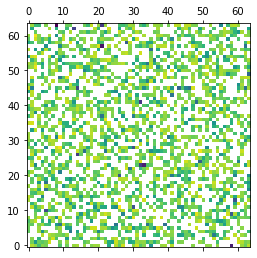

In [28]:
# lensing quantities
kwargs_spemd = {'theta_E': .66, 'gamma' : 2,'center_x': 0, 'center_y': 0, 'e1': .07, 'e2': -0.03}  # parameters of the deflector lens model
kwargs_lens = [kwargs_spemd]

# Sersic parameters in the initial simulation for the source
kwargs_sersic = {'amp': 16, 'R_sersic': 0.1, 'n_sersic': 1, 'e1': -0.1, 'e2': 0.1, 'center_x': 0, 'center_y': 0}
kwargs_source = [kwargs_sersic]

# generate image
image_model = imSim_hst.image(kwargs_lens, kwargs_source, kwargs_ps=None)
# turn 2d data in a 1d data vector

image_real = image_model + sim_hst.noise_for_model(model=image_model)


plt.matshow(np.log10((image_model - image_real) / np.sqrt(imSim_hst.Data.C_D_model(model=image_model))), origin='lower')
plt.show()

In [10]:
image_model

array([[8.76083425e-05, 9.35230613e-05, 1.00833441e-04, ...,
        8.53964718e-05, 8.07852551e-05, 7.48340099e-05],
       [9.53508468e-05, 1.00251961e-04, 1.07324396e-04, ...,
        9.37083316e-05, 8.87323842e-05, 8.32768646e-05],
       [1.04742056e-04, 1.09392724e-04, 1.15655943e-04, ...,
        1.02974873e-04, 9.87050283e-05, 9.31446420e-05],
       ...,
       [9.60969255e-05, 9.96010650e-05, 1.02187987e-04, ...,
        1.09960495e-04, 1.03379530e-04, 9.75576571e-05],
       [8.54324141e-05, 8.83414487e-05, 9.17022965e-05, ...,
        1.02330034e-04, 9.47308416e-05, 8.83722644e-05],
       [7.62101636e-05, 7.97838406e-05, 8.32925335e-05, ...,
        9.62177336e-05, 8.84930748e-05, 8.13190802e-05]])

In [11]:
import pandas as pd
import numpy as np


size_final = 10
seed = 42
image_model = np.zeros((size_final, 1,64,64))

In [12]:
import lenstronomy.Util.param_util as param_util
center_x = 0
center_y = 0
amp = 20
d = np.zeros((size_final,11))

for i in np.array([2, 7]):
    q =  np.random.default_rng(i).uniform(.7,1,size_final)
    phi = np.random.default_rng(i).uniform(0,math.pi,size_final)
    d[:,i] = (1-q[:])/(1+q[:])*np.cos(phi[:])
    d[:,i+1] = (1-q[:])/(1+q[:])*np.sin(phi[:])



seed = 42
d[:,0] = np.random.default_rng(seed).uniform(1,2,size_final)
d[:,1] = np.random.default_rng(seed).uniform(1.8,2.2,size_final)
d[:,4] = np.random.default_rng(seed).uniform(20,24,size_final)
d[:,5] = np.random.default_rng(seed).uniform(0.1,0.4,size_final)
d[:,6] = np.random.default_rng(seed).uniform(0.8,5,size_final)
d[:,9] = np.random.default_rng(seed+1).uniform(-0.5,0.5,size_final)
d[:,10] = np.random.default_rng(seed).uniform(-0.5,0.5,size_final)

metadata = pd.DataFrame(data=d)

metadata.columns = ['MASS_PROFILE_theta_E', 'MASS_PROFILE_gamma', 'MASS_PROFILE_e1', 'MASS_PROFILE_e2',
                    'SOURCE_PROFILE_amp', 'SOURCE_PROFILE_R_sersic', 'SOURCE_PROFILE_n_sersic', 'SOURCE_PROFILE_e1', 'SOURCE_PROFILE_e2','SOURCE_PROFILE_center_x', 'SOURCE_PROFILE_center_y']

In [13]:
d[9,10]

-0.049614062104432866

In [14]:
d[:,9]

array([ 0.15229926, -0.45622468, -0.47997041,  0.33921258,  0.08714305,
       -0.27529477,  0.25179227, -0.2363078 , -0.08002209, -0.04896861])

In [15]:
for i in np.arange(0,size_final):


    kwargs_spemd = {'theta_E': metadata['MASS_PROFILE_theta_E'][i], 'gamma': metadata['MASS_PROFILE_gamma'][i], 'center_x': center_x, 'center_y': center_y, 'e1':metadata['MASS_PROFILE_e1'][i], 'e2': metadata['MASS_PROFILE_e2'][i]}  # parameters of the deflector lens model
    kwargs_lens = [kwargs_spemd]

    # Sersic parameters in the initial simulation for the source
    kwargs_sersic = {'amp':  metadata['SOURCE_PROFILE_amp'][i], 'R_sersic': metadata['SOURCE_PROFILE_R_sersic'][i], 'n_sersic':  metadata['SOURCE_PROFILE_n_sersic'][i], 'e1':  metadata['SOURCE_PROFILE_e1'][i], 'e2':  metadata['SOURCE_PROFILE_e2'][i], 'center_x': metadata['SOURCE_PROFILE_center_x'][i], 'center_y':  metadata['SOURCE_PROFILE_center_y'][i]}
    kwargs_source = [kwargs_sersic]

    # generate image
    image_model[i,0,:,:] = imSim_hst.image(kwargs_lens, kwargs_source, kwargs_ps=None)


In [18]:
sim_hst.C_D

AttributeError: ignored

In [ ]:
plt.matshow(np.log10(image_model[1,0,:,:]), origin='lower')
plt.show()

In [ ]:
class LensDataset():
    def __init__(self, size, seed = 42, center_x = 0, center_y = 0, amp = 17, thetaE_range = [0.5, 1.25], gamma_range = [1.5, 2.5], ei_range = [-1, 1], Rsersic_range = [0, 30], nsersic_range = [1,10]):
        self.size = size
        self.param_range = np.stack((thetaE_range,gamma_range,ei_range,ei_range,Rsersic_range, nsersic_range,ei_range,ei_range))
        self.data = np.zeros((size_final,self.param_range.shape[0]))
        self.seed = seed
        self.center_x = center_x
        self.center_y = center_y
        self.amp = amp
        self.image = np.zeros((size_final, 1,64,64))
        psf_hdu = fits.open('oversampled_PSF.fits')
        kwargs_hst = HST().kwargs_single_band()
        kwargs_hst['kernel_point_source'] = np.array([tple[0:251] for tple in psf_hdu[0].data[0:251]])
        numPix = 64 

        kwargs_model = {'lens_model_list': ['PEMD'],  # list of lens models to be used
                        'source_light_model_list': ['SERSIC_ELLIPSE'],  # list of extended source models to be used
            }

        kwargs_numerics = {'point_source_supersampling_factor': 1}

        sim_hst = SimAPI(numpix=numPix, kwargs_single_band=kwargs_hst, kwargs_model=kwargs_model)
        self.imSim_hst = sim_hst.image_model_class(kwargs_numerics)

        for i in np.arange(0,self.param_range.shape[0]):
            self.data[:,i] = np.random.default_rng(self.seed).uniform(self.param_range[i,0],self.param_range[i,1],self.size)
        self.params = pd.DataFrame(data=self.data)
        self.params.columns = ['MASS_PROFILE_theta_E', 'MASS_PROFILE_gamma', 'MASS_PROFILE_e1', 'MASS_PROFILE_e2',
                                 'SOURCE_PROFILE_R_sersic', 'SOURCE_PROFILE_n_sersic', 'SOURCE_PROFILE_e1', 'SOURCE_PROFILE_e2']
        
        
        for i in np.arange(0,self.size):


            kwargs_spemd = {'theta_E': self.params['MASS_PROFILE_theta_E'][i], 'gamma': self.params['MASS_PROFILE_gamma'][i], 'center_x': self.center_x, 'center_y': self.center_y, 'e1':self.params['MASS_PROFILE_e1'][i], 'e2': self.params['MASS_PROFILE_e2'][i]}  # parameters of the deflector lens model
            kwargs_lens = [kwargs_spemd]

            # Sersic parameters in the initial simulation for the source
            kwargs_sersic = {'amp': self.amp, 'R_sersic': self.params['SOURCE_PROFILE_R_sersic'][i], 'n_sersic':  self.params['SOURCE_PROFILE_n_sersic'][i], 'e1':  self.params['SOURCE_PROFILE_e1'][i], 'e2':  self.params['SOURCE_PROFILE_e2'][i], 'center_x': self.center_x, 'center_y': self.center_y}
            kwargs_source = [kwargs_sersic]

            # generate image
            self.image[i,:,:] = self.imSim_hst.image(kwargs_lens, kwargs_source, kwargs_ps=None)
            
    def metadata(self):
        return self.params
    def images(self):
        return self.image

In [ ]:
dataset = LensDataset(10)

dataset.images()[0].shape